# Classify Car Evaluation using scikit-learn

# scikit-learn을 이용한 자동차 평가 분류

## Introduction

인공지능은 프로세스를 자동화하고, 비즈니스에 대한 통찰력을 모으고, 프로세스 속도를 높이기 위해 다양한 산업에서 사용되고 있습니다. 인공지능이 실제로 산업에 어떤 영향을 미치는지 실제 시나리오에서 인공지능의 사용을 연구하기 위해 Python을 사용할 것입니다.

자동차 평가 분류는 차량 구매 또는 자동차 영업에서 매우 중요한 문제입니다. 구매비용, 유지비용, 탑승인원 등의 다양한 데이터를 통해 그 평가 등급을 분류해 보는 것은 의미가 있습니다. 비록 우리가 현실적으로 얻을 수 있는 데이터와 차이가 있을 수 있지만, 만일 우리에게 필요한 자료가 주어진다면 그 차량이 너무 나빠서 도저히 검토 대상도 안되는지, 그런대로 괜찮은지, 좋은지 아니면 아주 좋은지를 판단하는데 도움을 줄 수 있을 것입니다. 실제로 이런 방법으로 차량을 구매하지는 않지만, 머신러닝의 지도학습 중에서 범주형 자료에 대한 분류 방법을 공부하는데 도움이 될 수 있습니다. 


이 노트북에서는 scikit-learn을 사용한 다양한 머신러닝 알고리즘을 사용한 자동차 평가 분류에 관하여 학습합니다.

# 차량 평가 데이터집합

## 데이터
본 강의에서는 [Kaggle](https://www.kaggle.com/datasets/elikplim/car-evaluation-data-set) 또는 https://archive.ics.uci.edu/ml/datasets/car+evaluation 에 있는 데이터집합을 사용하여 실험을 진행하겠습니다.

학습의 편의를 위해 위 사이트에서 다운로드 받은 데이터가 '[Dataset]\_Module11\_(car).csv'로 제공됩니다.

 이 데이터집합은 수치가 아니라 범주형 데이터를 포함하고 있어서 머신러닝을 적용하기 전에 인코딩을 수행해야 합니다.

## 0. 머신러닝 패키지 준비

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report

## 1. 데이터집합 로드
Pandas는 데이터 과학을 위한 인기 있는 Python 라이브러리입니다. 강력하고 유연한 데이터 구조를 제공하여 데이터 조작 및 분석을 더 쉽게 만듭니다.Pandas의 read_csv() 함수를 사용하여 CSV(Comma-Separated Values) 형식의 파일을 손쉽게 로드할 수 있습니다.

In [3]:
data = pd.read_csv('[Dataset]_Module11_(car).csv')
data.head()

,price,maint-cost,doors,persons,trunk-size,safety,acceptable
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   price       1728 non-null   object
 1   maint-cost  1728 non-null   object
 2   doors       1728 non-null   object
 3   persons     1728 non-null   object
 4   trunk-size  1728 non-null   object
 5   safety      1728 non-null   object
 6   acceptable  1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


## 2. 데이터 탐색 (Exploratory Data Analysis, EDA)

In [5]:
# 데이터집합의 통계적 특성 조회
data.describe()

,price,maint-cost,doors,persons,trunk-size,safety,acceptable
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [6]:
# 목표 열인 acceptable의 고유값 확인
data['acceptable'].unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [7]:
#등급별 개수 확인
data['acceptable'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: acceptable, dtype: int64

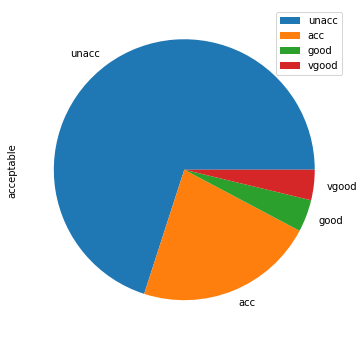

In [8]:
# acceptable 열의 분포 확인 (pie chart)
plt.figure(figsize=(6, 6))
data['acceptable'].value_counts().plot.pie(legend=True)

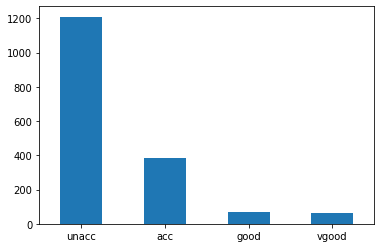

In [9]:
# acceptable 열의 분포 확인 (bar chart)
data['acceptable'].value_counts().plot.bar(rot=0)

## 3. 데이터 준비와 분할

In [10]:
# feature와 label로 구분
X = data.drop(['acceptable'], axis=1)
y = data.acceptable

In [11]:
X.head()

,price,maint-cost,doors,persons,trunk-size,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med


In [12]:
# 범주형 데이터 인코더/디코더
encoder = OrdinalEncoder()
X_encoded = encoder.fit_transform(X)
X_encoded

array([[3., 3., 0., 0., 2., 1.],
       [3., 3., 0., 0., 2., 2.],
       [3., 3., 0., 0., 2., 0.],
       ...,
       [1., 1., 3., 2., 0., 1.],
       [1., 1., 3., 2., 0., 2.],
       [1., 1., 3., 2., 0., 0.]])

In [13]:
#safety 살펴보기
X_encoded[:, 5]


array([1., 2., 0., ..., 1., 2., 0.])

In [14]:
#safety열을 OneHotEncoding
oh_encoder = OneHotEncoder(sparse = False)
ohe_safty = oh_encoder.fit_transform(X[['safety']]) 
ohe_safty

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [15]:
# feature data 6개 열 중에 safety를 제외한 0열 ~ 4열 총 5개 열
X_encoded[:,0:5].shape  

(1728, 5)

In [16]:
X_ohe = np.concatenate((X_encoded[:,0:5], ohe_safty), axis=1)
X_ohe

array([[3., 3., 0., ..., 0., 1., 0.],
       [3., 3., 0., ..., 0., 0., 1.],
       [3., 3., 0., ..., 1., 0., 0.],
       ...,
       [1., 1., 3., ..., 0., 1., 0.],
       [1., 1., 3., ..., 0., 0., 1.],
       [1., 1., 3., ..., 1., 0., 0.]])

In [17]:
X_ohe.shape

(1728, 8)

In [50]:
X=pd.DataFrame(X_ohe)
X

,0,1,2,3,4,5,6,7
0,3.0,3.0,0.0,0.0,2.0,0.0,1.0,0.0
1,3.0,3.0,0.0,0.0,2.0,0.0,0.0,1.0
2,3.0,3.0,0.0,0.0,2.0,1.0,0.0,0.0
3,3.0,3.0,0.0,0.0,1.0,0.0,1.0,0.0
4,3.0,3.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
1723,1.0,1.0,3.0,2.0,1.0,0.0,0.0,1.0
1724,1.0,1.0,3.0,2.0,1.0,1.0,0.0,0.0
1725,1.0,1.0,3.0,2.0,0.0,0.0,1.0,0.0
1726,1.0,1.0,3.0,2.0,0.0,0.0,0.0,1.0


In [51]:
# 데이터를 학습용과 시험용으로 분할
X_train, X_test, y_train, y_test = train_test_split(
    StandardScaler().fit_transform(X), y, test_size=0.2, random_state=1)


### cf)
### X_train, X_test, y_train, y_test = train_test_split(
#    StandardScaler().fit_transform(X_encoded), y, test_size=0.2, random_state=1)



## 4. 분류기 모델 생성 및 학습

### 4.1 로지스틱 회귀 (Logistic Regression)

모델생성 -> model = <분류_알고리듬>(하이퍼매개변수)

모델학습 -> model.fit(features, labels)

In [52]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [53]:
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.44      0.61      0.51        59
        good       0.00      0.00      0.00        14
       unacc       0.90      0.90      0.90       260
       vgood       0.40      0.15      0.22        13

    accuracy                           0.78       346
   macro avg       0.44      0.42      0.41       346
weighted avg       0.76      0.78      0.77       346



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 4.2 k-최근접 이웃 (k-Nearest Neightbors, KNN)

In [54]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [55]:
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.74      0.98      0.85        59
        good       1.00      0.57      0.73        14
       unacc       1.00      0.96      0.98       260
       vgood       1.00      0.77      0.87        13

    accuracy                           0.94       346
   macro avg       0.93      0.82      0.86       346
weighted avg       0.95      0.94      0.94       346



In [56]:
print(list(y_test[:10]))
print("---------------------------------------------------------")
print(list(knn.predict(X_test[:10])))

['unacc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'acc', 'unacc']
---------------------------------------------------------
['unacc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'acc', 'unacc']


### 4.3 결정 트리 (Decision Tree)

In [57]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [58]:
y_pred = dtc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.91      0.98      0.94        59
        good       0.93      0.93      0.93        14
       unacc       1.00      0.98      0.99       260
       vgood       0.92      0.92      0.92        13

    accuracy                           0.97       346
   macro avg       0.94      0.95      0.95       346
weighted avg       0.98      0.97      0.97       346



### 4.4 랜덤 포레스트 (Random Forest)

In [59]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [60]:
y_pred = rfc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.87      0.98      0.92        59
        good       0.92      0.86      0.89        14
       unacc       1.00      0.98      0.99       260
       vgood       1.00      0.92      0.96        13

    accuracy                           0.97       346
   macro avg       0.95      0.94      0.94       346
weighted avg       0.97      0.97      0.97       346



### 4.5 XGBoost (eXtreme Gradient Boosting)

In [61]:
from xgboost import XGBClassifier
xgbc = XGBClassifier()
xgbc.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob')

In [62]:
y_pred = xgbc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.78      0.97      0.86        59
        good       0.75      0.43      0.55        14
       unacc       1.00      0.97      0.98       260
       vgood       0.92      0.92      0.92        13

    accuracy                           0.95       346
   macro avg       0.86      0.82      0.83       346
weighted avg       0.95      0.95      0.94       346



### 4.6 다층 퍼셉트론 (Multi-Layer Perceptron)

In [63]:
from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier()
mlpc.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier()

In [64]:
y_pred = mlpc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.88      0.98      0.93        59
        good       0.88      1.00      0.93        14
       unacc       1.00      0.98      0.99       260
       vgood       1.00      0.69      0.82        13

    accuracy                           0.97       346
   macro avg       0.94      0.91      0.92       346
weighted avg       0.97      0.97      0.97       346



# 5. 더 좋은 모델 찾기

## 결정 트리 사례

In [65]:
# 현재 사용중인 매개변수 확인
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [66]:
# 교차 검증 기능으로 wrap하여 훈련시킴
dtr = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(), 
    param_distributions=dict(criterion=['gini', 'entropy'],
                             max_depth=[2,4,6,8,10,12]), 
    n_iter=10, cv=3, 
    verbose=2, random_state=42, n_jobs=-1)
dtr.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 4, 6, 8, 10, 12]},
                   random_state=42, verbose=2)

In [67]:
y_pred = dtr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.89      1.00      0.94        59
        good       0.86      0.86      0.86        14
       unacc       1.00      0.98      0.99       260
       vgood       1.00      0.85      0.92        13

    accuracy                           0.97       346
   macro avg       0.94      0.92      0.93       346
weighted avg       0.97      0.97      0.97       346



이 결과가 4.3에서 생성한 결정 트리 모델 dtc에 비해 더 나은 결과를 산출했나요? 제3주차 강의에서 학습한 FLAML을 사용한 경우와 비교하면 어떠한가요?

# 6. predict vs. predict_proba

In [68]:
# 몇 개의 데이터에 대한 항목 예측
print(list(y_test[:5]))
print("-----------------------------------------")
print(list(lr.predict(X_test[:5])))

['unacc', 'acc', 'unacc', 'unacc', 'unacc']
-----------------------------------------
['unacc', 'acc', 'unacc', 'unacc', 'unacc']


In [69]:
# 몇 개의 데이터에 대한 확률 예측
# 매 데이터마다 분류항목의 개수만큼의 확률들의 배열 산출
lr.predict_proba(X_test[:5])

array([[9.06485979e-04, 5.30696568e-04, 9.98536613e-01, 2.62046079e-05],
       [7.27611957e-01, 1.67725068e-01, 9.80073371e-02, 6.65563852e-03],
       [1.39569226e-01, 3.97999721e-02, 8.20474110e-01, 1.56691195e-04],
       [8.94170782e-02, 1.76988107e-02, 8.92785715e-01, 9.83957912e-05],
       [5.59291110e-02, 1.63795421e-02, 9.27682013e-01, 9.33364946e-06]])

In [70]:
# 매 데이터마다 확률 예측 값이 가장 큰 위치 판별
maxpos = [np.argmax(proba) for proba in lr.predict_proba(X_test[:5])]
maxpos

[2, 0, 2, 2, 2]

In [71]:
# 모델의 분류 항목 (순서 중요!)
lr.classes_

array(['acc', 'good', 'unacc', 'vgood'], dtype=object)

In [72]:
lr.classes_[maxpos]

array(['unacc', 'acc', 'unacc', 'unacc', 'unacc'], dtype=object)

In [73]:
# 이상을 종합하여 함수로 작성
# 임의의 Scikit-Learn 호환 분류 모델에 적용 가능
def predict_via_proba(model, data):
    return model.classes_[[np.argmax(proba) for proba in model.predict_proba(data)]]

In [74]:
# predict_via_proba 실험: 로지스틱 회귀 모델 lr의 경우
predict_via_proba(lr, X_test[:5]), lr.predict(X_test[:5])

(array(['unacc', 'acc', 'unacc', 'unacc', 'unacc'], dtype=object),
 array(['unacc', 'acc', 'unacc', 'unacc', 'unacc'], dtype=object))

In [75]:
# predict_via_proba 실험: 랜덤 포레스트 모델 rfc의 경우
predict_via_proba(rfc, X_test[:5]), rfc.predict(X_test[:5])

(array(['unacc', 'acc', 'unacc', 'unacc', 'unacc'], dtype=object),
 array(['unacc', 'acc', 'unacc', 'unacc', 'unacc'], dtype=object))

# 6. 모델 설명

## 로지스틱 회귀 사례

   feature      coef
0        0  0.000494
1        1  0.037377
2        2 -0.022504
3        3  0.235236
4        4  0.117331
5        5  0.201320
6        6 -0.830086
7        7  0.628766


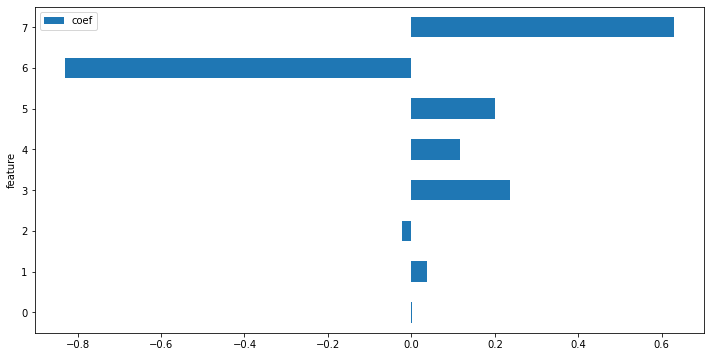

In [76]:
lr_exp = pd.DataFrame({'feature': X.columns.tolist(), 'coef': lr.coef_[0]})
print(lr_exp)
lr_exp.plot(kind='barh', x='feature', y='coef', figsize=(12, 6))

## 결정 트리 사례

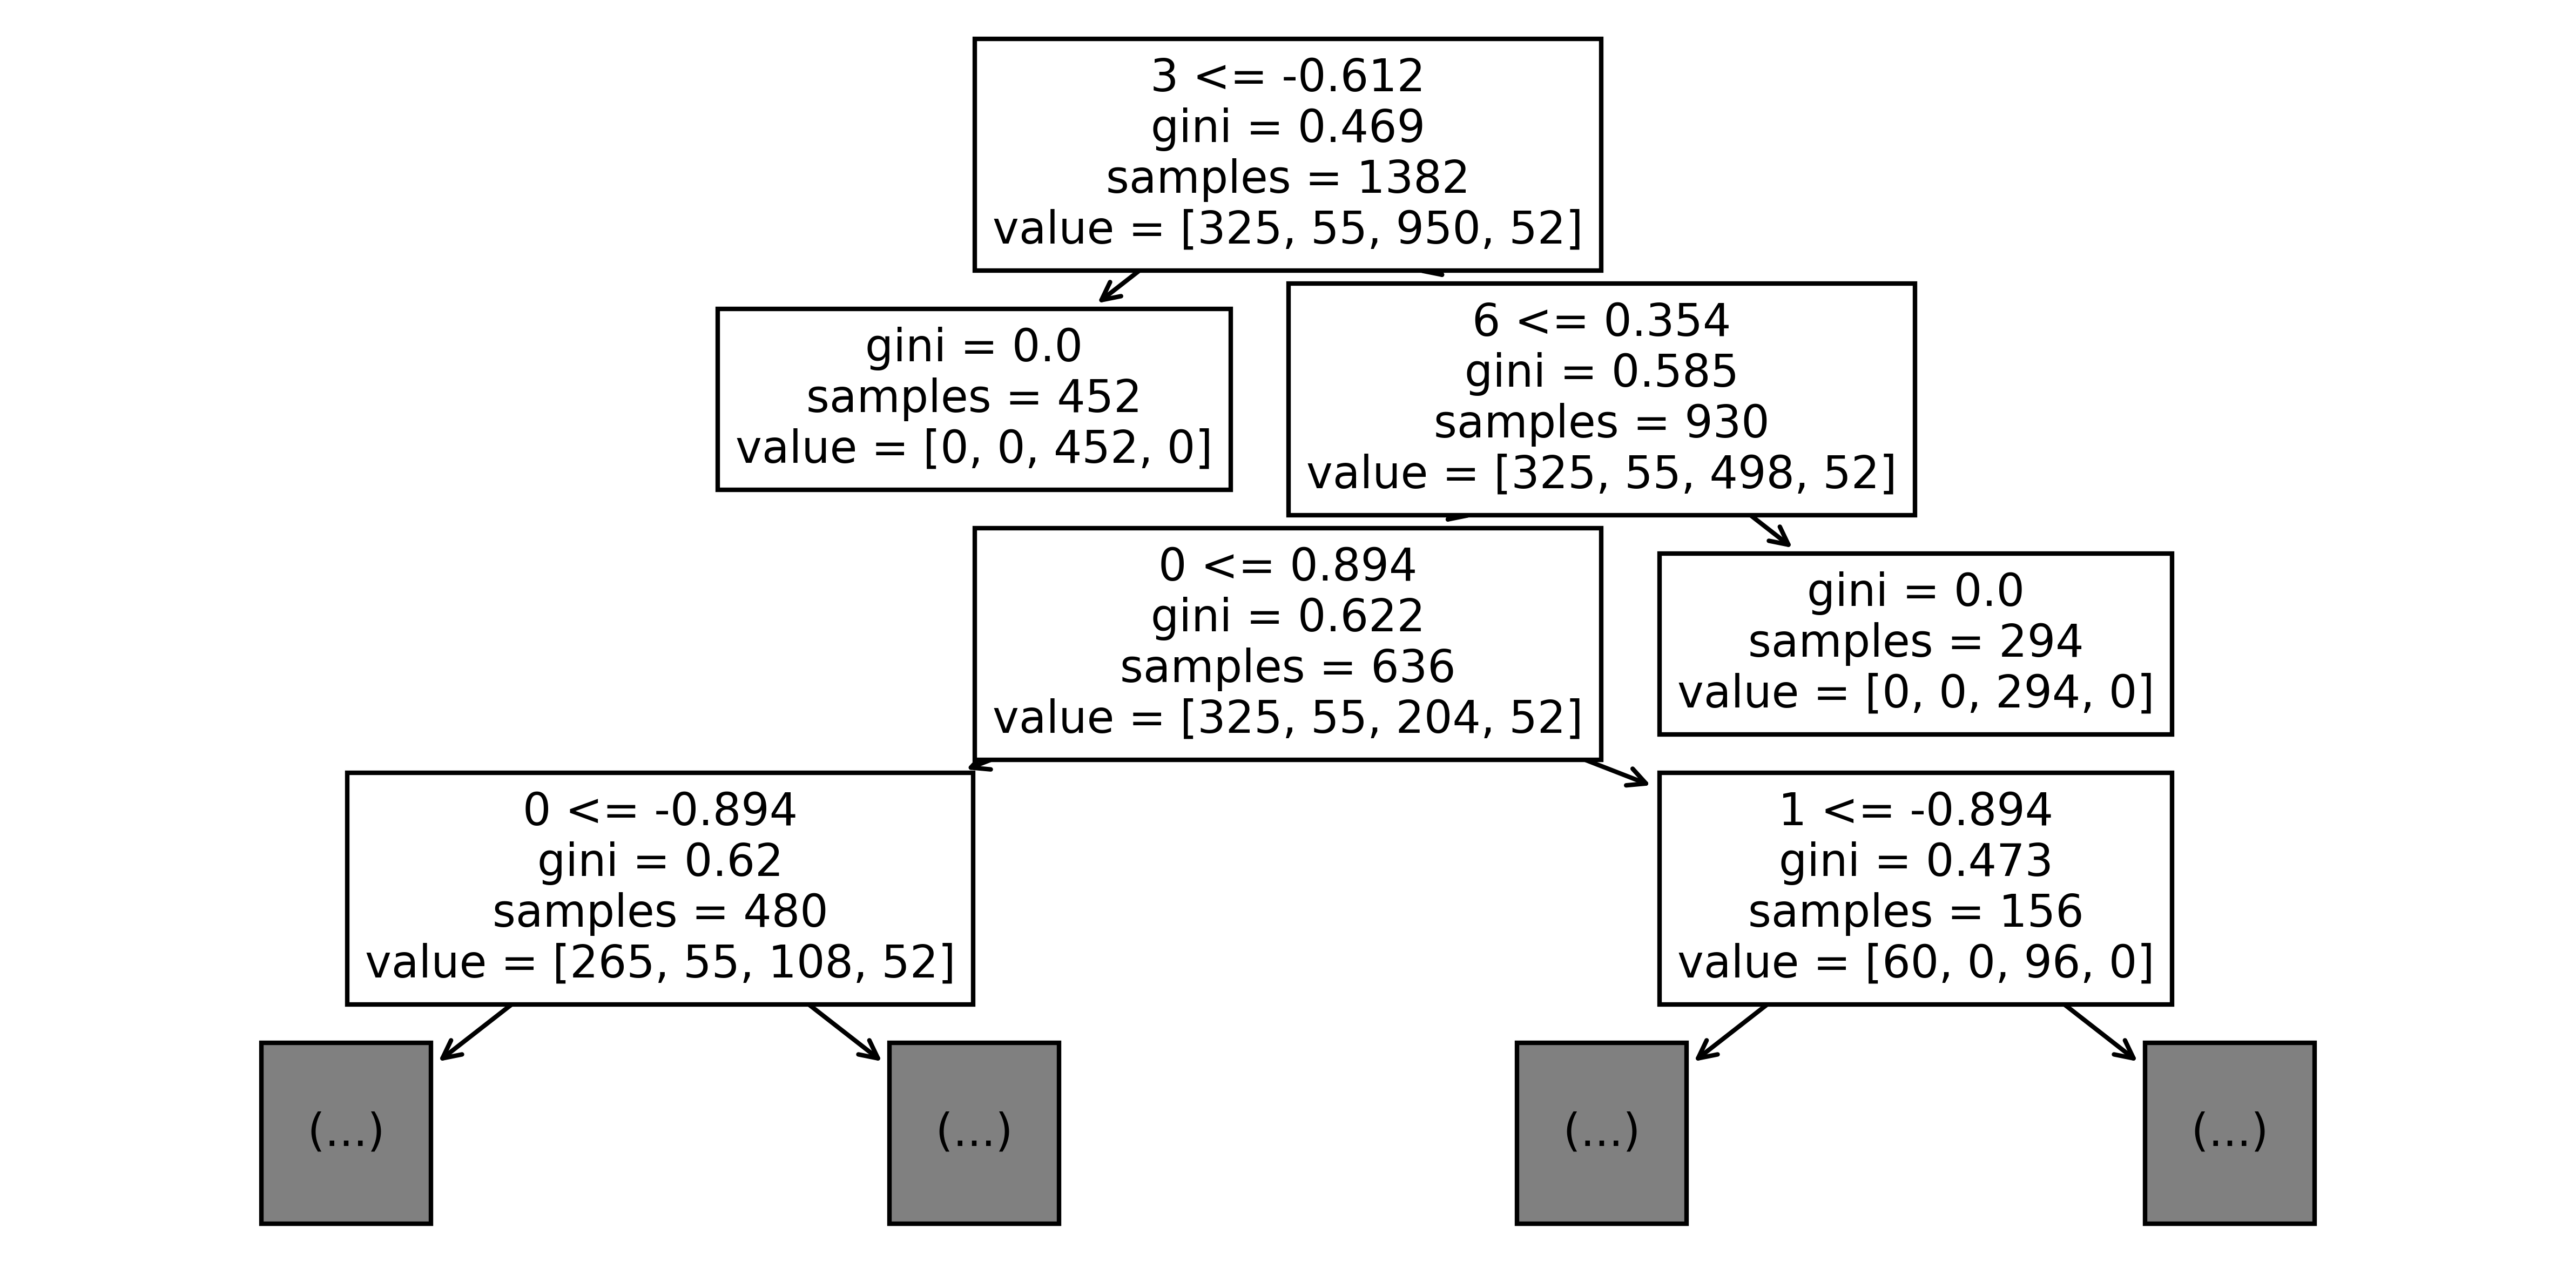

In [77]:
from sklearn import tree
plt.figure(figsize=(10, 5), dpi=600)
_ = tree.plot_tree(dtc, feature_names=X.columns.tolist(), max_depth=3, filled=None)

# 결론

본 실험에서는 자동차의 품질을 평가하는 사례를 통해 또 다른 분류 문제를 머신러닝을 사용하여 해결해 보았습니다. 앞에서 학습했던 적포도주 등급 나누기 문제와는 다른 문제임에도 불구하고 머신러닝 코드는 구조적으로 앞에서와 완전히 동일합니다. 이러한 일관성은 두 문제 모두 "분류" 문제라는 특성에서 기인한 것입니다. 이처럼 Scikit-Learn은 머신러닝 관점에서 동일한 부류의 문제에 대하여 데이터집합이나 사용하는 알고리듬이 변경되더라도 코드의 구조를 유지할 수 있는 장점을 제공합니다.

또한 XGBoost나 LightGBM은 Scikit-Learn의 멤버가 아니지만 의도적으로 Scikit-Learn과 동일한 인터페이스를 제공하여 Scikit-Learn 모델이 사용될 수 있는 임의의 프로그램에서 사용될 수 있도록 하였습니다.

우리는 이러한 다양한 알고리즘을 범주형 데이터인 자동차 평가 데이터셋에  적용하여 기계학습의 모델생성과 평가에 관하여 학습하였습니다.